In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [148]:
data = pd.read_csv('heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
  * looks at stress of heart during excercise
  * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)
13. thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

### Exploratory Data Analysis

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.target.value_counts(normalize=True) #Data is balanced

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot:>

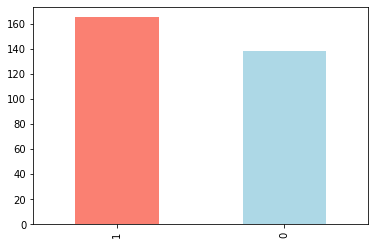

In [8]:
#Plot the value counts with a bargraph
data.target.value_counts().plot(kind='bar', color=['salmon','lightblue'])

##### Heart Disease Frequency according to Gender

In [9]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:>

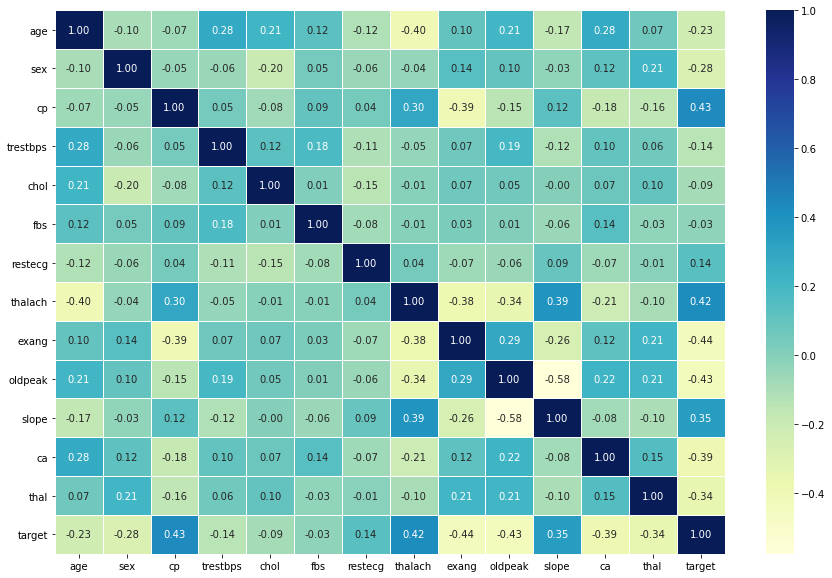

In [11]:
# Correlation of factors
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,linewidths=0.5,
           fmt="0.2f",
           cmap="YlGnBu")

### Split data into training set

In [184]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [14]:
# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [15]:
# Function to fit and score all models
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(),
          'Linear SVC': LinearSVC()}

def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    # Import the modes and the training data
    fitted_models = {}
    for name, model in models.items():
        fitted_model = model.fit(X_train, y_train)
        score = fitted_model.score(X_test, y_test)
        fitted_models[name] = score
    return fitted_models    



In [16]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)
print(model_scores)

{'KNN': 0.5901639344262295, 'Logistic Regression': 0.8852459016393442, 'Random Forest': 0.8852459016393442, 'Linear SVC': 0.7540983606557377}


C:\Users\molli\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\molli\anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Model Comparison

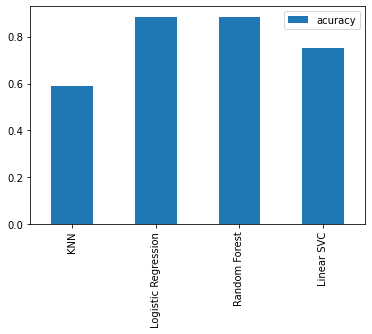

In [17]:
model_compare = pd.DataFrame(model_scores, index=['acuracy'])
model_compare.T.plot.bar();

### Hyperparameter using RandomSearchCV
Logistic Regression and Random Forrest

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
# Hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,10),
                "solver": ['newton-cg', 'liblinear']}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(1, 5000, 50),
           'max_depth': [None, 1,2,3,4,5],
           'min_samples_split': np.arange(2,100,2),
           'min_samples_leaf': np.arange(1, 50, 2)}


In [73]:
# Tune LogisticRegression
np.random.seed(100)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv= 5,
                               n_iter = 50,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

C:\Users\molli\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [74]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.3593813663804626}

In [75]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [69]:
# Tune RandomForest
np.random.seed(100)

rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                               param_distributions = rf_grid,
                               cv= 5,
                               n_iter = 20,
                               verbose=5)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=None, min_samples_leaf=23, min_samples_split=44, n_estimators=4401; total time=   4.3s
[CV 2/5] END max_depth=None, min_samples_leaf=23, min_samples_split=44, n_estimators=4401; total time=   2.4s
[CV 3/5] END max_depth=None, min_samples_leaf=23, min_samples_split=44, n_estimators=4401; total time=   2.4s
[CV 4/5] END max_depth=None, min_samples_leaf=23, min_samples_split=44, n_estimators=4401; total time=   2.4s
[CV 5/5] END max_depth=None, min_samples_leaf=23, min_samples_split=44, n_estimators=4401; total time=   2.5s
[CV 1/5] END max_depth=1, min_samples_leaf=37, min_samples_split=2, n_estimators=2751; total time=   1.6s
[CV 2/5] END max_depth=1, min_samples_leaf=37, min_samples_split=2, n_estimators=2751; total time=   1.6s
[CV 3/5] END max_depth=1, min_samples_leaf=37, min_samples_split=2, n_estimators=2751; total time=   1.6s
[CV 4/5] END max_depth=1, min_samples_leaf=37, min_samples_split=2, n_

[CV 2/5] END max_depth=1, min_samples_leaf=21, min_samples_split=42, n_estimators=3151; total time=   1.8s
[CV 3/5] END max_depth=1, min_samples_leaf=21, min_samples_split=42, n_estimators=3151; total time=   1.8s
[CV 4/5] END max_depth=1, min_samples_leaf=21, min_samples_split=42, n_estimators=3151; total time=   1.8s
[CV 5/5] END max_depth=1, min_samples_leaf=21, min_samples_split=42, n_estimators=3151; total time=   1.8s
[CV 1/5] END max_depth=1, min_samples_leaf=37, min_samples_split=96, n_estimators=1301; total time=   0.8s
[CV 2/5] END max_depth=1, min_samples_leaf=37, min_samples_split=96, n_estimators=1301; total time=   0.8s
[CV 3/5] END max_depth=1, min_samples_leaf=37, min_samples_split=96, n_estimators=1301; total time=   0.8s
[CV 4/5] END max_depth=1, min_samples_leaf=37, min_samples_split=96, n_estimators=1301; total time=   0.9s
[CV 5/5] END max_depth=1, min_samples_leaf=37, min_samples_split=96, n_estimators=1301; total time=   0.8s
[CV 1/5] END max_depth=3, min_samples

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68...
       1101, 1151, 1201, 1251, 1301, 1351, 1401, 1451, 1501, 1551, 1601,
       1651, 1701, 1751, 1801, 1851, 1901, 1951, 2001, 2051, 2101, 2151,
       2201, 2251, 2301, 2351, 2401, 2451, 2501, 2551, 2601, 2651, 2701,
       2751, 2801, 2851, 2901, 2951, 3001, 3051, 3101, 3151, 3201, 3251,
       3301, 3351, 3401, 3451, 3501, 3551, 3601, 3651, 3701, 3751, 3801,
       3851, 3901, 3951, 4001, 4051, 4101, 4151, 4201, 4251, 4301, 4351,
       4401, 445

In [70]:
rs_rf.best_params_

{'n_estimators': 4901,
 'min_samples_split': 66,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [71]:
rs_rf.score(X_test, y_test)

0.8852459016393442

### Tuning RandomForest hyperparameters using gridsearch

In [41]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(400, 800, 50),
           'max_depth': [None],
           'min_samples_split': np.arange(10,40,2),
           'min_samples_leaf': np.arange(2, 6, 1)}

In [51]:
# Tune RandomForest
np.random.seed(100)

gs_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                               param_grid = rf_grid,
                               cv= 2,
                               verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 480 candidates, totalling 960 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None],
                         'min_samples_leaf': array([2, 3, 4, 5]),
                         'min_samples_split': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
                         'n_estimators': array([400, 450, 500, 550, 600, 650, 700, 750])},
             verbose=True)

In [77]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 32,
 'n_estimators': 700}

In [78]:
gs_rf.score(X_test, y_test)

0.8852459016393442

## Conclusion - Evaluation of Model
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Prescision
* Recall
* F1-score

In [80]:
# Make predittion with tuned model
y_preds = rs_rf.predict(X_test)

In [82]:
# Import Model Evaluations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

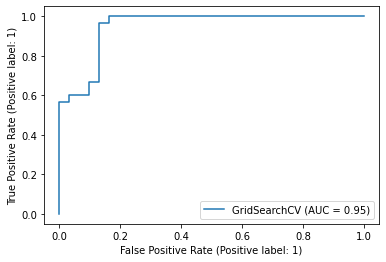

In [84]:
# Plot ROC curve and calculate AUC metric for rs_rf
plot_roc_curve(gs_rf, X_test, y_test)

#### ROC Curve and AUC Score

In [85]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  7]
 [ 0 30]]


#### Confusion Matrix

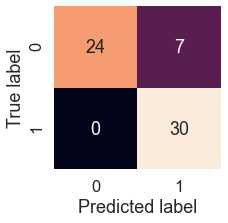

In [92]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    sns.set(font_scale=1.5)

plot_conf_mat(y_test, y_preds)

#### Classification report

In [94]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        31
           1       0.81      1.00      0.90        30

    accuracy                           0.89        61
   macro avg       0.91      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61



##### Calculate evaluation metrics using cross-validation
Calculate accuracy, precision, recall, f1-score of the best model using cross-validation function `cross_val_score()`

In [125]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 32,
 'n_estimators': 700}

In [98]:
# New instance of the best parameters
clf = RandomForestClassifier(max_depth=None, min_samples_leaf=5, min_samples_split=32, n_jobs=-1, n_estimators=700)

In [121]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8316393442622951

In [131]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8315083527583529

In [132]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696969

In [134]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8577715392170253

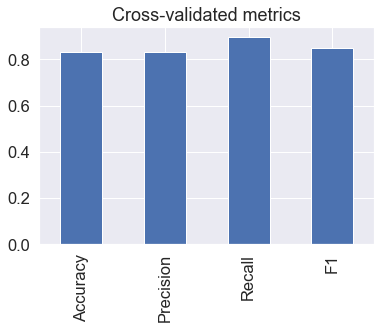

In [146]:
# Visualize cross-vlaidated metrics

metric_scores = {"Accuracy": cv_acc,
        "Precision": cv_precision,
        "Recall": cv_recall,
        "F1": cv_f1_score}
arr = np.array(metric_scores)
#print(arr)

cv_metrics = pd.DataFrame(metric_scores, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated metrics", legend=False );

### Feature Importance
Feature importance is another way of asking which features contributed most to the outcome of the model?

In [149]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [167]:
# New instance of the best parameters
clf = RandomForestClassifier(max_depth=None, min_samples_leaf=5, min_samples_split=32, n_jobs=-1, n_estimators=700)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_

<AxesSubplot:title={'center':'Feature importance for Random Forest Classifier'}>

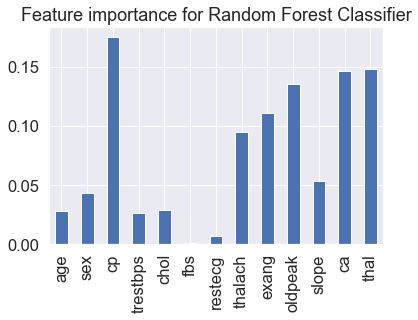

In [177]:
fi = pd.DataFrame([feature_importance], columns=X_train.columns)
fi.T.plot.bar(legend=False, title="Feature importance for Random Forest Classifier")